In [68]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

In [69]:
load_dotenv()

True

In [70]:
class ParentState(TypedDict):

    question: str
    answer_eng: str
    answer_hin: str
    

In [71]:
import os

parent_llm = ChatOpenAI(
    model='gpt4all',

)
subgraph_llm = ChatOpenAI(
    model='gpt4all',
    
)

In [72]:
def translate_text(state: ParentState):

    prompt = f"""
Translate the following text to Hindi.
Keep it natural and clear. Do not add extra content.

Text:
{state["answer_eng"]}
""".strip()
    
    translated_text = subgraph_llm.invoke(prompt).content

    return {'answer_hin': translated_text}

In [73]:
subgraph_builder = StateGraph(ParentState)

subgraph_builder.add_node('translate_text', translate_text)

subgraph_builder.add_edge(START, 'translate_text')
subgraph_builder.add_edge('translate_text', END)

subgraph = subgraph_builder.compile()

In [74]:
def generate_answer(state: ParentState):

    answer = parent_llm.invoke(f"You are a helpful assistant. Answer clearly.\n\nQuestion: {state['question']}").content
    return {'answer_eng': answer}

In [75]:
parent_builder = StateGraph(ParentState)

parent_builder.add_node("answer", generate_answer)
parent_builder.add_node("translate", subgraph)

parent_builder.add_edge(START, 'answer')
parent_builder.add_edge('answer', 'translate')
parent_builder.add_edge('translate', END)

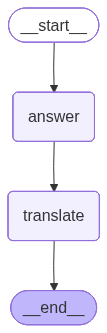

In [76]:
graph = parent_builder.compile()

graph

In [78]:
graph.invoke({'question': 'What is quantum physics'})

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-or-v1*************************************************************3b6c. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'code': 'invalid_api_key', 'param': None}, 'status': 401}